<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/Gold_1st_type_dataset_3DTensor_CNN_2_layers_epoch50_patience5_5_minute_High%26LwPrices_2020_10_%D0%BE%D1%82%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3D-Tensor (NoGenerator) 
## CNN with metrics 2020      
### Predictions of High & Low prices together
### High & low prices during Five(5) next minutes
- Early-Stopping
- MSE - main

### length of analysed history - 50 minutes ago
#### two experiments:
- mse. mae, mape,
- mse only
#### test
- 355.590 rows


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn

from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.12.0


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
np.random.seed(19)

### Data

In [6]:
data = pd.read_csv('GOLD_2020_normilised_1st-type-set.csv', low_memory=False, sep=',')

In [7]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
0,0.108231,0.111283,0.108231,0.110034,0.005273,0.005202,0.454761,0.000073,0.945542,0.962431,0.955981,0.967750,1,1,0.111283,0.109298
1,0.110002,0.110739,0.109554,0.110707,0.002304,0.002375,0.454841,0.000073,0.966421,0.967750,0.967750,0.967750,0,0,0.110739,0.110339
2,0.110659,0.110691,0.110259,0.110531,0.001676,0.001958,0.454961,0.000292,0.967086,0.967750,0.967750,0.967750,0,0,0.110691,0.111043
3,0.110499,0.110643,0.110227,0.110643,0.001021,0.001092,0.454841,0.000073,0.967750,0.967750,0.967086,0.967750,0,0,0.110643,0.111027
4,0.110723,0.111299,0.110515,0.111011,0.002008,0.002173,0.454894,0.000170,0.967086,0.967750,0.966421,0.968415,0,0,0.111299,0.111331


In [8]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
355585,0.714906,0.715215,0.714255,0.715215,0.007692,0.003068,0.452196,0.004779,0.969080,0.955649,0.967884,0.959904,0,0,0.715215,0.715036
355586,0.715215,0.715375,0.714906,0.714906,0.001045,0.000898,0.454719,0.000152,0.963960,0.966554,0.973004,0.971674,0,0,0.715375,0.715564
355587,0.714906,0.715215,0.714906,0.714927,0.001814,0.001869,0.454832,0.000057,0.967086,0.945342,0.967086,0.933373,0,0,0.715215,0.715707
355588,0.715090,0.715330,0.714930,0.715087,0.002354,0.001173,0.454136,0.001220,0.940156,0.950130,0.948334,0.954851,0,0,0.715330,0.716182
355589,0.715042,0.715215,0.714767,0.714842,0.002542,0.000788,0.453813,0.001813,0.949797,0.929384,0.961500,0.913891,0,0,0.715215,0.715702


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355590 entries, 0 to 355589
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          355590 non-null  float64
 1   High_Bid          355590 non-null  float64
 2   Low_Bid           355590 non-null  float64
 3   Close_Bid         355590 non-null  float64
 4   Volume_Bid        355590 non-null  float64
 5   Volume_Ask        355590 non-null  float64
 6   Volume_Delta      355590 non-null  float64
 7   Volume_Delta_abs  355590 non-null  float64
 8   Open_Delta        355590 non-null  float64
 9   High_Delta        355590 non-null  float64
 10  Low_Delta         355590 non-null  float64
 11  Close_Delta       355590 non-null  float64
 12  New_day           355590 non-null  int64  
 13  New_week          355590 non-null  int64  
 14  Y_High_Bid_1      355590 non-null  float64
 15  Y_Low_Ask_1       355590 non-null  float64
dtypes: float64(14), int6

In [10]:
#downsising

data['Open_Bid']   = pd.to_numeric(data['Open_Bid'],downcast='float')
data['High_Bid']   = pd.to_numeric(data['High_Bid'],downcast='float')
data['Low_Bid']    = pd.to_numeric(data['Low_Bid'],downcast='float')
data['Close_Bid']  = pd.to_numeric(data['Close_Bid'],downcast='float')

data['Volume_Bid']       = pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']       = pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Volume_Delta']     = pd.to_numeric(data['Volume_Delta'],downcast='float')
data['Volume_Delta_abs'] = pd.to_numeric(data['Volume_Delta_abs'],downcast='float')

data['Open_Delta']   = pd.to_numeric(data['Open_Delta'],downcast='float')
data['High_Delta']   = pd.to_numeric(data['High_Delta'],downcast='float')
data['Low_Delta']    = pd.to_numeric(data['Low_Delta'],downcast='float')
data['Close_Delta']  = pd.to_numeric(data['Close_Delta'],downcast='float')

data['Y_High_Bid_1']   = pd.to_numeric(data['Y_High_Bid_1'],downcast='float')
data['Y_Low_Ask_1']    = pd.to_numeric(data['Y_Low_Ask_1'],downcast='float')

In [11]:
data['New_day']  = pd.to_numeric(data['New_day'],downcast='integer')
data['New_week'] = pd.to_numeric(data['New_week'],downcast='integer')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355590 entries, 0 to 355589
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          355590 non-null  float32
 1   High_Bid          355590 non-null  float32
 2   Low_Bid           355590 non-null  float32
 3   Close_Bid         355590 non-null  float32
 4   Volume_Bid        355590 non-null  float32
 5   Volume_Ask        355590 non-null  float32
 6   Volume_Delta      355590 non-null  float32
 7   Volume_Delta_abs  355590 non-null  float32
 8   Open_Delta        355590 non-null  float32
 9   High_Delta        355590 non-null  float32
 10  Low_Delta         355590 non-null  float32
 11  Close_Delta       355590 non-null  float32
 12  New_day           355590 non-null  int8   
 13  New_week          355590 non-null  int8   
 14  Y_High_Bid_1      355590 non-null  float32
 15  Y_Low_Ask_1       355590 non-null  float32
dtypes: float32(14), int8

In [13]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
count,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000,3.555900e+05,355590.000000,355590.000000,355590.000000,355590.000000,355590.000000
mean,0.513288,0.513853,0.512721,0.513289,0.013392,0.013288,0.454742,0.003634,0.966707,0.967038,9.668373e-01,0.966589,0.000728,0.000149,0.513853,0.513527
std,0.226005,0.225994,0.226016,0.226004,0.012672,0.012313,0.005152,0.008723,0.030690,0.030660,3.144567e-02,0.030276,0.026978,0.012208,0.225994,0.225919
min,0.001200,0.003809,0.000000,0.001296,0.000000,0.000000,0.000000,0.000000,0.007780,0.003990,8.740635e-15,0.034377,0.000000,0.000000,0.003809,0.000551
25%,0.326389,0.327208,0.325492,0.326388,0.005118,0.005105,0.453757,0.000487,0.965955,0.966421,9.661546e-01,0.965955,0.000000,0.000000,0.327208,0.326668
50%,0.517118,0.517529,0.516664,0.517134,0.010074,0.010006,0.454801,0.001843,0.973934,0.974001,9.739344e-01,0.973934,0.000000,0.000000,0.517529,0.517505
75%,0.709501,0.709997,0.709005,0.709496,0.017964,0.017918,0.455763,0.004611,0.979254,0.979453,9.794534e-01,0.979254,0.000000,0.000000,0.709997,0.709624
max,0.998111,0.998196,0.994163,0.998004,0.839158,1.000000,1.000000,1.000000,0.999535,0.999867,1.000000e+00,1.000000,1.000000,1.000000,0.998196,0.994841


In [14]:
data.shape

(355590, 16)

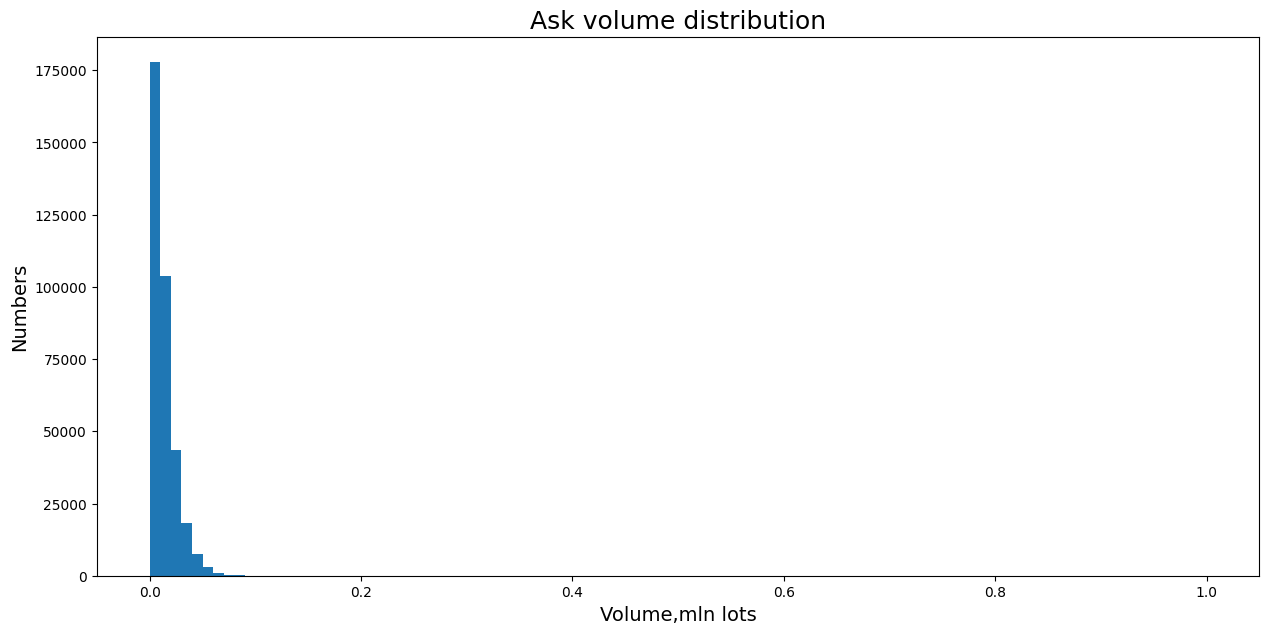

In [15]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [16]:
# !! here it is possible to take 2-Sigma or 3-Sigma

# in the code below, we remove 10% of lots by volume, which, however, make up the vast majority of trades.
# Those we consider only data outliers by volume

vol_Ask_90 = data[data['Volume_Ask'] > 0.1]       # More than 1 mln lots

vol_Ask_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 3752 to 341464
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          136 non-null    float32
 1   High_Bid          136 non-null    float32
 2   Low_Bid           136 non-null    float32
 3   Close_Bid         136 non-null    float32
 4   Volume_Bid        136 non-null    float32
 5   Volume_Ask        136 non-null    float32
 6   Volume_Delta      136 non-null    float32
 7   Volume_Delta_abs  136 non-null    float32
 8   Open_Delta        136 non-null    float32
 9   High_Delta        136 non-null    float32
 10  Low_Delta         136 non-null    float32
 11  Close_Delta       136 non-null    float32
 12  New_day           136 non-null    int8   
 13  New_week          136 non-null    int8   
 14  Y_High_Bid_1      136 non-null    float32
 15  Y_Low_Ask_1       136 non-null    float32
dtypes: float32(14), int8(2)
memory usage: 

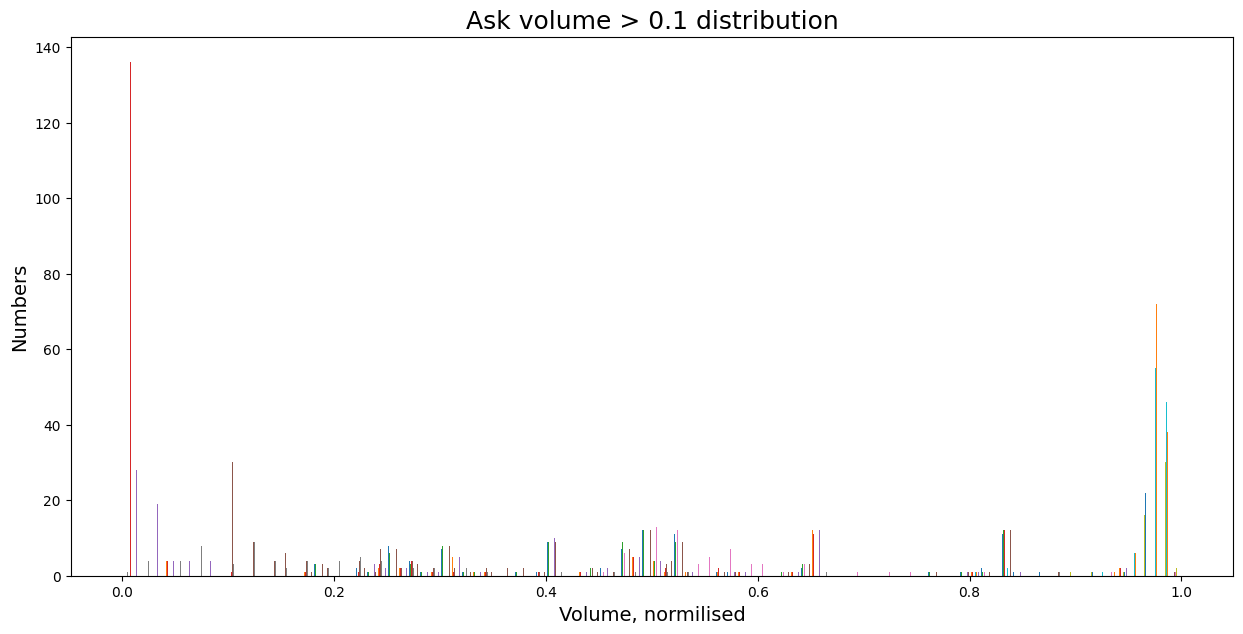

In [17]:
# 'Volume_Ask' > 0.1 - More than 10% from maximum number of lots

plt.figure(num=1, figsize=(15,7))

plt.hist(vol_Ask_90, bins=100)

plt.title('Ask volume > 0.1 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume, normilised',size=14);

### Date transformation
to  3D numpy inputs tensor 
and 2D outputs vector

In [18]:
# we need a three-dimensional data tensor: [(n-N + 1), N, 13] and
# two-dimensional array of answers [(n-N + 1), 2] with the High and Low prices DURING next 5 minutes
# we shift prices sequentially from 1 to 5 minutes up.
# where N=50 is the number of minutes for analysis at each step those are looking backward 

# then you need to delete the 5 last sliced graphs (N*13), 
# since there is no prices for the next 5 minutes for it

# Therefore we need:
# three-dimensional data tensor of cliced graphs [(n - N + 1 - 5), N, 13] and
# two-dimensional array of answers Y[(n - N + 1 - 5), 2] with he High and Low prices shifted sequentially from 1 to 5 rows up.

In [19]:
# !!! We do not need to cut the number of rows because 
# we analase 1-minutes data and total number of rows is 355,590

In [20]:
n=data.shape[0]
p=data.shape[1]

In [21]:
print('Rows number is ',n)
print('Colonms number is ',p)

Rows number is  355590
Colonms number is  16


In [22]:
# create inputs Dataframe

data_ax = data.drop(['Y_High_Bid_1', 'Y_Low_Ask_1'],axis=1)

In [23]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355590 entries, 0 to 355589
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          355590 non-null  float32
 1   High_Bid          355590 non-null  float32
 2   Low_Bid           355590 non-null  float32
 3   Close_Bid         355590 non-null  float32
 4   Volume_Bid        355590 non-null  float32
 5   Volume_Ask        355590 non-null  float32
 6   Volume_Delta      355590 non-null  float32
 7   Volume_Delta_abs  355590 non-null  float32
 8   Open_Delta        355590 non-null  float32
 9   High_Delta        355590 non-null  float32
 10  Low_Delta         355590 non-null  float32
 11  Close_Delta       355590 non-null  float32
 12  New_day           355590 non-null  int8   
 13  New_week          355590 non-null  int8   
dtypes: float32(12), int8(2)
memory usage: 17.0 MB


In [24]:
data_ax.shape

(355590, 14)

# create outputs Dataframe

In [25]:
data_ay = data[['Y_High_Bid_1', 'Y_Low_Ask_1']]

In [26]:
data_ay.shape

(355590, 2)

In [27]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1
355580,0.714794,0.714466
355581,0.714906,0.715260
355582,0.714906,0.715436
355583,0.714906,0.715228
355584,0.714906,0.715388
355585,0.715215,0.715036
355586,0.715375,0.715564
355587,0.715215,0.715707
355588,0.715330,0.716182
355589,0.715215,0.715702


In [28]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1
0,0.111283,0.109298
1,0.110739,0.110339
2,0.110691,0.111043
3,0.110643,0.111027
4,0.111299,0.111331
5,0.111459,0.111555


In [29]:
# shift by one minute(row) up
# we have to exclude the min and max prices of the current minute while further 
# finding the min and max prices DURING the next 5 minutes

data_ay = data_ay.shift(-1)

In [30]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1
355580,0.714906,0.715260
355581,0.714906,0.715436
355582,0.714906,0.715228
355583,0.714906,0.715388
355584,0.715215,0.715036
355585,0.715375,0.715564
355586,0.715215,0.715707
355587,0.715330,0.716182
355588,0.715215,0.715702
355589,NaN,NaN


In [31]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1
0,0.110739,0.110339
1,0.110691,0.111043
2,0.110643,0.111027
3,0.111299,0.111331
4,0.111459,0.111555
5,0.111363,0.112014


# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# forward looking window

In [32]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_15'] = data_ay['Y_High_Bid_1'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_15']  = data_ay['Y_Low_Ask_1'].rolling(window=indexer).min()

In [33]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1,Y_High_Bid_15,Y_Low_Ask_15
355580,0.714906,0.715260,0.715215,0.715036
355581,0.714906,0.715436,0.715375,0.715036
355582,0.714906,0.715228,0.715375,0.715036
355583,0.714906,0.715388,0.715375,0.715036
355584,0.715215,0.715036,0.715375,0.715036
355585,0.715375,0.715564,NaN,NaN
355586,0.715215,0.715707,NaN,NaN
355587,0.715330,0.716182,NaN,NaN
355588,0.715215,0.715702,NaN,NaN
355589,NaN,NaN,NaN,NaN


In [34]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1,Y_High_Bid_15,Y_Low_Ask_15
0,0.110739,0.110339,0.111459,0.110339
1,0.110691,0.111043,0.111459,0.111027
2,0.110643,0.111027,0.111763,0.111027
3,0.111299,0.111331,0.111827,0.111331
4,0.111459,0.111555,0.111912,0.111555
5,0.111363,0.112014,0.111912,0.110915


# remove unused columns

In [35]:
data_ay = data_ay.drop(['Y_High_Bid_1', 'Y_Low_Ask_1'],axis=1)

In [36]:
data_ay.tail(6)

,Y_High_Bid_15,Y_Low_Ask_15
355584,0.715375,0.715036
355585,NaN,NaN
355586,NaN,NaN
355587,NaN,NaN
355588,NaN,NaN
355589,NaN,NaN


# delete the 5 last rows in data_ay (because answers are incorrect)

In [37]:
for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [38]:
data_ay.tail(6)

,Y_High_Bid_15,Y_Low_Ask_15
355579,0.714906,0.714466
355580,0.715215,0.715036
355581,0.715375,0.715036
355582,0.715375,0.715036
355583,0.715375,0.715036
355584,0.715375,0.715036


In [39]:
data_ax.tail(4)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
355586,0.715215,0.715375,0.714906,0.714906,0.001045,0.000898,0.454719,0.000152,0.963960,0.966554,0.973004,0.971674,0,0
355587,0.714906,0.715215,0.714906,0.714927,0.001814,0.001869,0.454832,0.000057,0.967086,0.945342,0.967086,0.933373,0,0
355588,0.715090,0.715330,0.714930,0.715087,0.002354,0.001173,0.454136,0.001220,0.940156,0.950130,0.948334,0.954851,0,0
355589,0.715042,0.715215,0.714767,0.714842,0.002542,0.000788,0.453813,0.001813,0.949797,0.929384,0.961500,0.913891,0,0


In [43]:
# delete the last 5 rows in data_ax (because we don't know the price for next 5 minutes)

for i in range(5):
  data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)
data_ax.tail(4)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
355581,0.714794,0.714906,0.714794,0.714794,0.001563,0.000432,0.454164,0.001169,0.980983,0.972339,0.980983,0.973668,0,0
355582,0.714906,0.714906,0.714794,0.714906,0.001553,0.000665,0.454301,0.000917,0.978323,0.967019,0.973668,0.973668,0,0
355583,0.714906,0.714906,0.714794,0.714906,0.002050,0.000626,0.453999,0.001472,0.971275,0.971275,0.982313,0.973934,0,0
355584,0.714906,0.714906,0.714794,0.714906,0.004977,0.001511,0.452848,0.003583,0.974333,0.967019,0.975663,0.973668,0,0


In [44]:
# delete the last row in data_ay (because answers are NaN)

data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [45]:
data_ay.tail(4)

,Y_High_Bid_15,Y_Low_Ask_15
355580,0.715215,0.715036
355581,0.715375,0.715036
355582,0.715375,0.715036
355583,0.715375,0.715036


In [46]:
# Create inputs Numpy

#data_a = np.array(data_ax[:n]) 
data_a = np.array(data_ax) 

print("data_a:")
print(data_a[:2,:])  
print('\n')
print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 

data_a:
[[1.0823061e-01 1.1128291e-01 1.0823061e-01 1.1003446e-01 5.2727484e-03
  5.2020610e-03 4.5476139e-01 7.3058072e-05 9.4554162e-01 9.6243101e-01
  9.5598114e-01 9.6775049e-01 1.0000000e+00 1.0000000e+00]
 [1.1000245e-01 1.1073871e-01 1.0955429e-01 1.1070670e-01 2.3038820e-03
  2.3745694e-03 4.5484105e-01 7.3058072e-05 9.6642065e-01 9.6775049e-01
  9.6775049e-01 9.6775049e-01 0.0000000e+00 0.0000000e+00]]


[[7.1490628e-01 7.1490628e-01 7.1479422e-01 7.1490628e-01 2.0499313e-03
  6.2571344e-04 4.5399868e-01 1.4719849e-03 9.7127467e-01 9.7127467e-01
  9.8231268e-01 9.7393441e-01 0.0000000e+00 0.0000000e+00]
 [7.1490628e-01 7.1490628e-01 7.1479422e-01 7.1490628e-01 4.9769087e-03
  1.5106136e-03 4.5284802e-01 3.5825516e-03 9.7433341e-01 9.6701908e-01
  9.7566330e-01 9.7366846e-01 0.0000000e+00 0.0000000e+00]]
numpy size: =  (355585, 14)
type:  float32


In [47]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.11145897 0.11033857]
 [0.11145897 0.11102682]
 [0.11176307 0.11102682]]


[[0.71537524 0.71503592]
 [0.71537524 0.71503592]
 [0.71537524 0.71503592]]
numpy size: =  (355584, 2)
type:  float64


#### Create the 3D inputs tensor

In [48]:
# Progress bar

from tqdm import tqdm

In [49]:
N=50               # sliding window depth
L=n-N-4              # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L-1,N,t)

Size of a three-dimensional inputs tensor:  355535 50 14


In [50]:
# create imputs zeros 3D tensors with 'float32'
data_b = np.zeros( (L-1, N, t), dtype= 'float32' ) 

In [51]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L-1, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and Low_Ask

In [52]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n - N - 4 = ', n-N-4, L)
for k in tqdm(range(L-1)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid_1 - 1 minute future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask_1 -  1 minute future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n - N - 4 =  355536 355536


100%|██████████| 355535/355535 [00:01<00:00, 230940.36it/s]

355534
data_b: 
 [[[0.10823061 0.11128291 0.10823061 ... 0.9677505  1.         1.        ]
  [0.11000245 0.11073871 0.10955429 ... 0.9677505  0.         0.        ]
  [0.11065868 0.1106907  0.11025854 ... 0.9677505  0.         0.        ]
  ...
  [0.10858274 0.10858274 0.10776645 ... 0.98124874 0.         0.        ]
  [0.10787849 0.10823061 0.10787849 ... 0.98257864 0.         0.        ]
  [0.10813458 0.10813458 0.10765441 ... 0.98257864 0.         0.        ]]

 [[0.11000245 0.11073871 0.10955429 ... 0.9677505  0.         0.        ]
  [0.11065868 0.1106907  0.11025854 ... 0.9677505  0.         0.        ]
  [0.11049863 0.11064268 0.11022653 ... 0.9677505  0.         0.        ]
  ...
  [0.10787849 0.10823061 0.10787849 ... 0.98257864 0.         0.        ]
  [0.10813458 0.10813458 0.10765441 ... 0.98257864 0.         0.        ]
  [0.10792651 0.10799053 0.10776645 ... 0.9805838  0.         0.        ]]

 [[0.11065868 0.1106907  0.11025854 ... 0.9677505  0.         0.        ]
  [0.

In [53]:
# control of the correctness of filling the array Y 
# (should show the normalised prices High_Bid and Low_Ask - MAX and MIN during five next minutes(step) ahead)
# may not match

import random

pp = random.randint(50, L-1) # (any number before 355535) - just to look at the middle of data_b
print('random int = ', pp)

#pp = 89564 # (any number before 249945) - just to look at the middle of data_b

print('\t','data_b:', '\t\t\t','Y:')
print('Y_High_Bid_1 ','\t\t','Y_High_Bid_1')

for i in range(7):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])


random int =  103941
	 data_b: 			 Y:
Y_High_Bid_1  		 Y_High_Bid_1
0.38786638 		 0.3864419
0.3864419 		 0.38432914
0.38319272 		 0.38432914
0.38432914 		 0.38296863
0.38296863 		 0.3831287
0.38208833 		 0.3831287
0.38042372 		 0.3831287


In [54]:
# Each rows of Y above must have prices of one minute to future (may not match)

In [55]:
data = []
data

[]

In [56]:
data_ax = []
data_ax

[]

In [57]:
data_ay = []
data_ay

[]

In [58]:
data_a = []
data_a

[]

In [59]:
data_y = []
data_y

[]

## Train Test Split
- ~90% for training and validation
- ~10% for testing

In [60]:
np.round((0.9*(L-1)),0)

319982.0

In [61]:
train_start=0
train_end=int(np.round(0.9*(L-1),-2))
print(L-1,train_end)

355535 320000


In [62]:
test_start = train_end + 1
test_end = L-1
print(test_start, test_end)

320001 355535


In [63]:
print('test size = ',test_end-train_end)

test size =  35535


In [64]:
# form X_train and X_test
# Divide data_b into two unequal parts: for training (X_train) and for test (X_test)

X_train = np.zeros( ( train_end, N, t) , dtype= 'float32')
X_test  = np.zeros( ( test_end-train_end, N, t) , dtype= 'float32')

for z in tqdm(range(test_end)):
    if z < train_end:
        X_train[z,:,:] = data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]  = data_b[z,:,:]    


print("X_train: ", X_train.shape, '\n')
print("X_test:  ", X_test.shape, '\n')

100%|██████████| 355535/355535 [00:01<00:00, 324722.65it/s]

X_train:  (320000, 50, 14) 

X_test:   (35535, 50, 14) 



In [65]:
y_train = np.zeros( ( train_end, 2) , dtype= 'float32')
y_test  = np.zeros( ( test_end-train_end, 2) , dtype= 'float32')

print("y_train: ", y_train.shape, '\n')
print("y_test:  ", y_test.shape, '\n')

y_train:  (320000, 2) 

y_test:   (35535, 2) 



In [66]:
for z in tqdm(range(test_end)):
    if z < train_end:
        y_train[z,:] = Y[z,:]
    else:
        y_test[z-train_end,:]  = Y[z,:]    

print("y_train: ", y_train.shape, '\n')
print("y_test:  ", y_test.shape, '\n')

100%|██████████| 355535/355535 [00:00<00:00, 880428.28it/s]

y_train:  (320000, 2) 

y_test:   (35535, 2) 



#### Final control

In [67]:
# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (320000, 50, 14)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (320000, 2)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (35535, 50, 14)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (35535, 2)


### Training

### CNN

In [68]:
model=keras.Sequential([
    
    keras.layers.Conv1D(50,9, padding='same', input_shape=(50,14), activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7, padding='same', activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(2)
    
])


In [69]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 50)            6350      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 50)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 2)                 5

#### Callbacks

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [71]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=10, verbose=1)

In [72]:
mc = ModelCheckpoint(
    'CNN_mse_2020_Batch20_Epoch50_Patience10_during-5-minute_HighLowPrices_history-50min-{epoch:02d}-{val_mse:.9f}_corrected.h5', 
                     monitor='val_mse', mode='min', save_best_only=True)


In [73]:
#model.compile(optimizer="adam",loss="mse",metrics=['mse', 'mae', 'mape', 'mase', 'cosine_similarity'])
model.compile(optimizer="adam",loss="mse",metrics=['mse','mae', 'mape'])

In [74]:
history = model.fit(X_train, y_train, batch_size=20, epochs=50,
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es, mc])

Epoch 1/50
14400/14400 [==============================] - 71s 4ms/step - loss: 9.1756e-05 - mse: 9.1756e-05 - mae: 0.0041 - mape: 1.3042 - val_loss: 5.0968e-06 - val_mse: 5.0968e-06 - val_mae: 0.0015 - val_mape: 0.2089
Epoch 2/50
14400/14400 [==============================] - 57s 4ms/step - loss: 1.2579e-05 - mse: 1.2579e-05 - mae: 0.0026 - mape: 0.8192 - val_loss: 5.9603e-06 - val_mse: 5.9603e-06 - val_mae: 0.0018 - val_mape: 0.2620
Epoch 3/50
14400/14400 [==============================] - 60s 4ms/step - loss: 9.0029e-06 - mse: 9.0029e-06 - mae: 0.0022 - mape: 0.7174 - val_loss: 3.4254e-06 - val_mse: 3.4254e-06 - val_mae: 0.0012 - val_mape: 0.1697
Epoch 4/50
14400/14400 [==============================] - 60s 4ms/step - loss: 7.5501e-06 - mse: 7.5501e-06 - mae: 0.0020 - mape: 0.6602 - val_loss: 4.9295e-06 - val_mse: 4.9295e-06 - val_mae: 0.0018 - val_mape: 0.2528
Epoch 5/50
14400/14400 [==============================] - 60s 4ms/step - loss: 6.7342e-06 - mse: 6.7342e-06 - mae: 0.0019 - 

In [76]:
# load the saved best model
# It has to be chosen manually from the saved best models.

CNN_saved_best_model = keras.models.load_model(
    '/content/CNN_mse_2020_Batch20_Epoch50_Patience10_during-5-minute_HighLowPrices_history-50min-18-0.000002092_corrected.h5')

#### Test

In [77]:
# Evaluate the quality of network training on test data (which the network did NOT see)

scores = CNN_saved_best_model.evaluate(X_test, y_test, verbose=1)

# mse, mae, mape = model.evaluate(X_test, y_test, verbose=0)

1111/1111 [==============================] - 3s 3ms/step - loss: 1.6908e-06 - mse: 1.6908e-06 - mae: 8.2656e-04 - mape: 0.1307


In [78]:
scores

[1.6907922599784797e-06,
 1.6907922599784797e-06,
 0.0008265599026344717,
 0.13069821894168854]

##  <font color='red'>! There are GOOD MSE / MAE / MAPE value during next 5 minutes for 2020 with CNN </font>

In [79]:
print("Mean squared error (mse): %.9f " % (scores[1]))

Mean squared error (mse): 0.000001691 


In [80]:
print("Mean absolute error (mae): %.9f " % (scores[2]))

Mean absolute error (mae): 0.000826560 


In [81]:
#  ?? check it later is it a part or per cent

#print("Mean absolute percentage error (mape): %.3f %%" % (scores[3]*100))
print("Mean absolute percentage error (mape): %.3f %%" % scores[3])

Mean absolute percentage error (mape): 0.131 %


### Visualisation

In [82]:
plt.style.use('seaborn-darkgrid') 

<ipython-input-82-e922cac9a80f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


#### MSE graphs during training

Text(0.5, 0, 'Mean Squared Error')

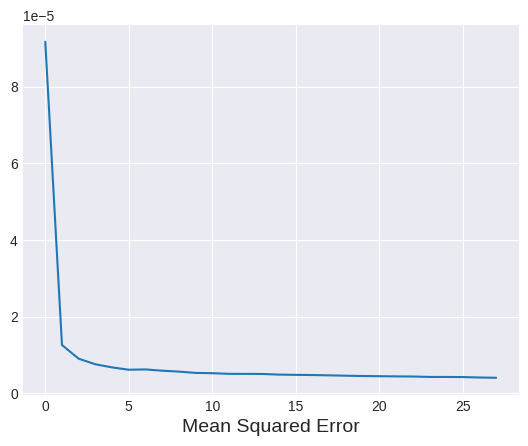

In [83]:
# Training Mean Squared Error (MSE)

pyplot.plot(history.history['mse'])
#pyplot.plot(history.history['mse'][1:])
plt.xlabel('Mean Squared Error',size=14)

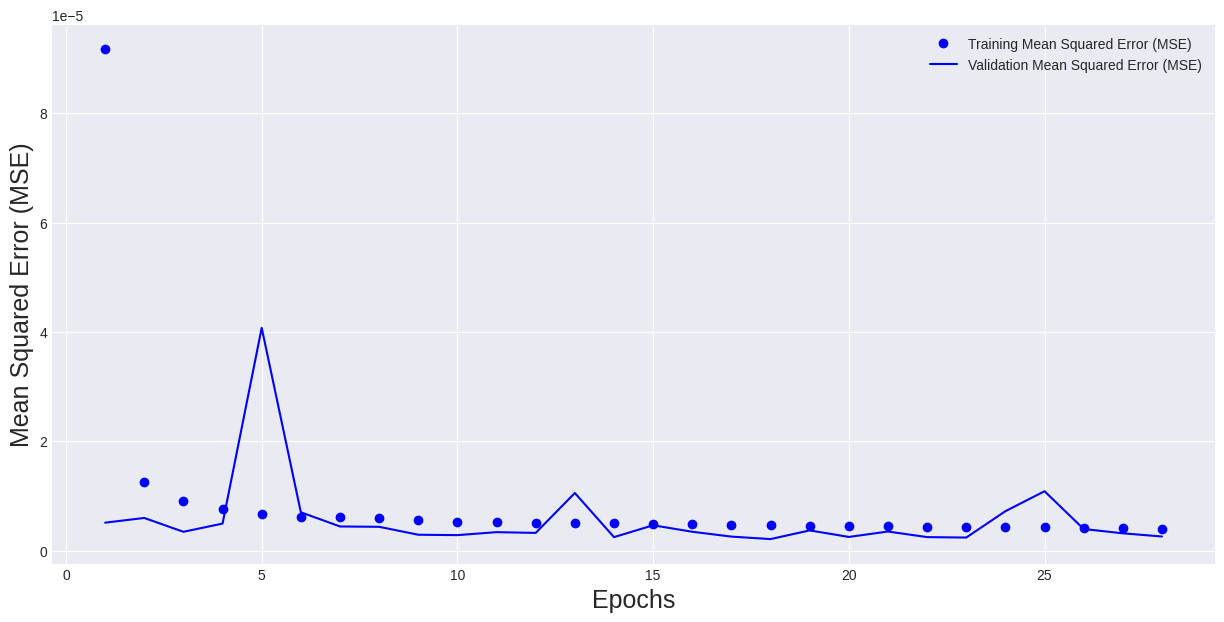

In [84]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse']

val_mse_values = history_dict['val_mse']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

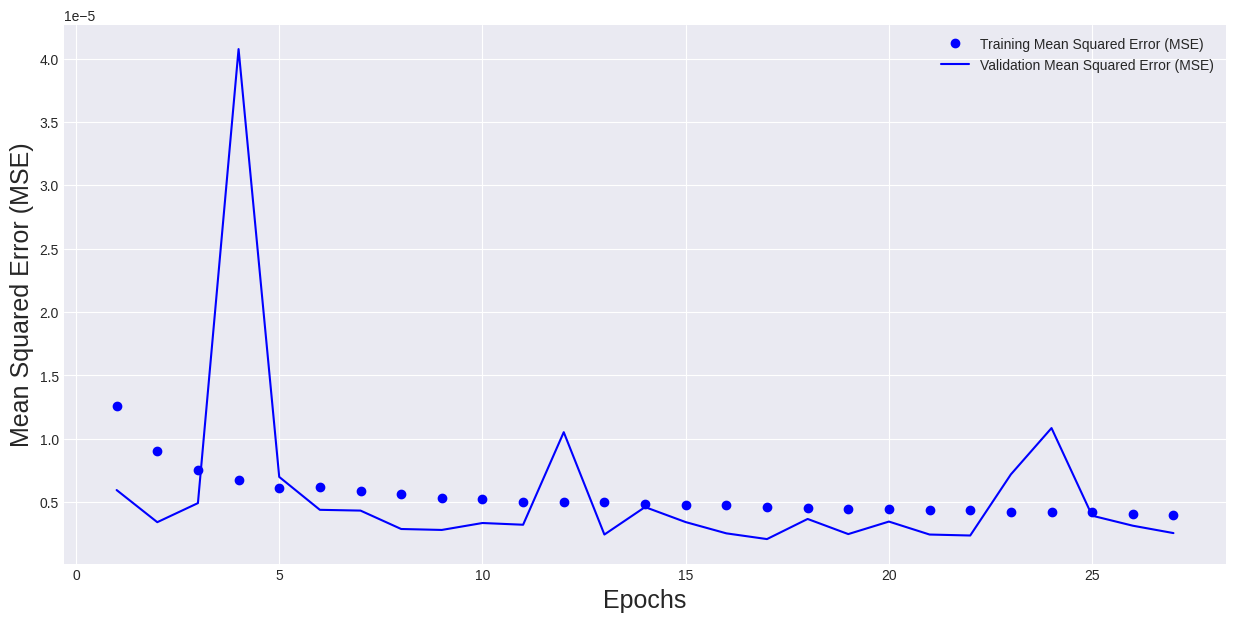

In [85]:
# deleted the 1st epoch

history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse'][1:]

val_mse_values = history_dict['val_mse'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

#### MAE graphs during training

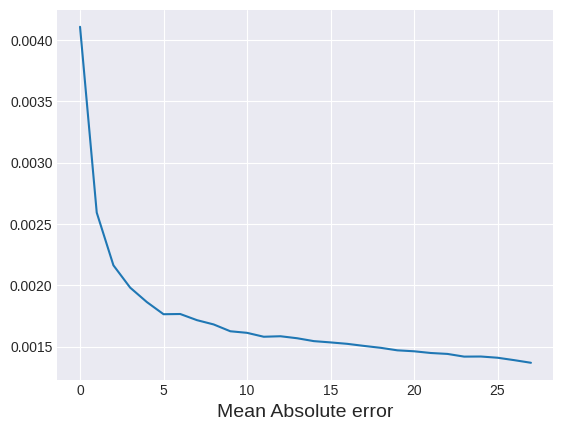

In [86]:
# Training Mean Absolute Error(MAE)

pyplot.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
pyplot.show()

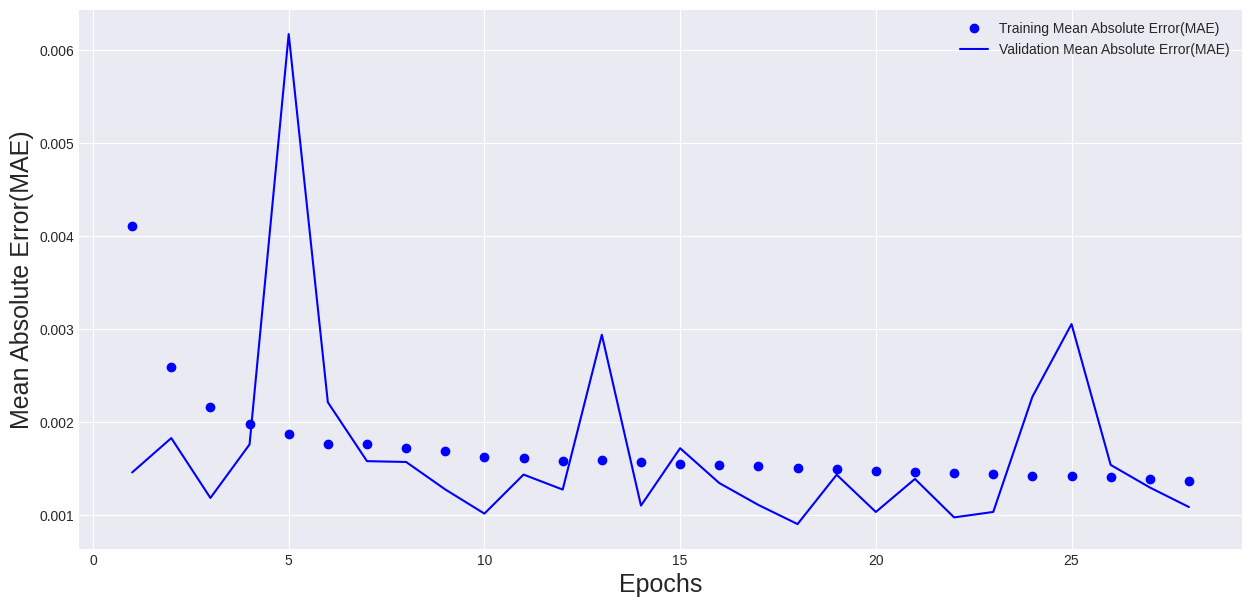

In [87]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mae_values = history_dict['mae']

val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'bo', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, 'b', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

#### Mean Absolute Percentage Error(MAPE) graphs during training

Text(0.5, 0, 'Mean Absoulte Percentage Error')

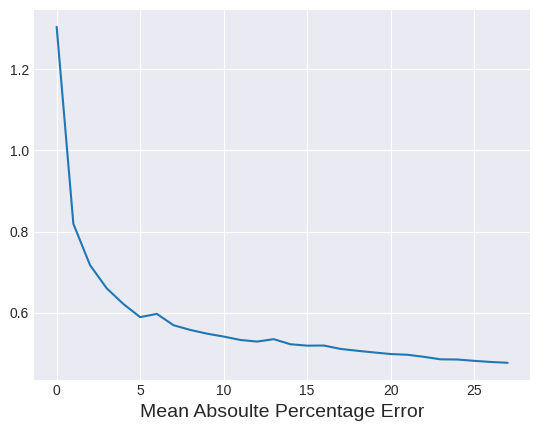

In [88]:
# Training Mean Absolute Percentage Error(MAPE)

pyplot.plot(history.history['mape'])
plt.xlabel('Mean Absoulte Percentage Error',size=14)

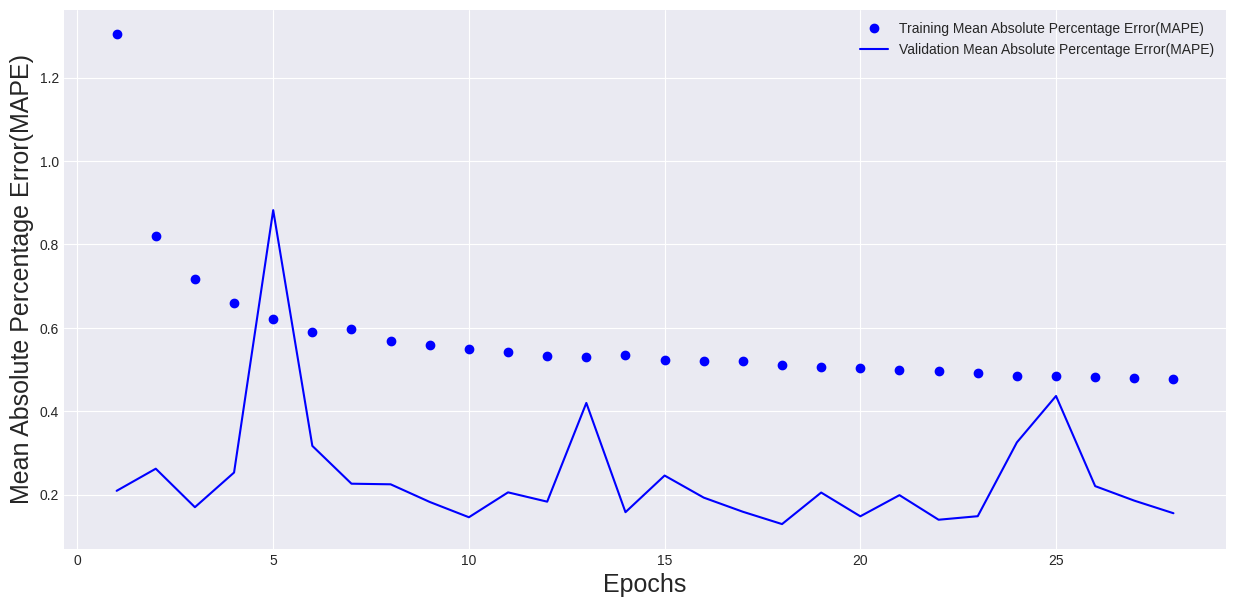

In [89]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mape_values = history_dict['mape']

val_mape_values = history_dict['val_mape']

epochs = range(1, len(mape_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mape_values, 'bo', label='Training Mean Absolute Percentage Error(MAPE)')
plt.plot(epochs, val_mape_values, 'b', label='Validation Mean Absolute Percentage Error(MAPE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Percentage Error(MAPE)', size=18)
plt.legend()
plt.show()

### prediction 5 minute ahead

In [90]:
pred = CNN_saved_best_model(X_test)


In [91]:
print(pred)

tf.Tensor(
[[0.5652284  0.5636556 ]
 [0.56531125 0.5637742 ]
 [0.565583   0.5641946 ]
 ...
 [0.7155729  0.7144438 ]
 [0.71567196 0.7145568 ]
 [0.7156458  0.71453106]], shape=(35535, 2), dtype=float32)


In [92]:
len(pred)

35535

### Normilised Price chart

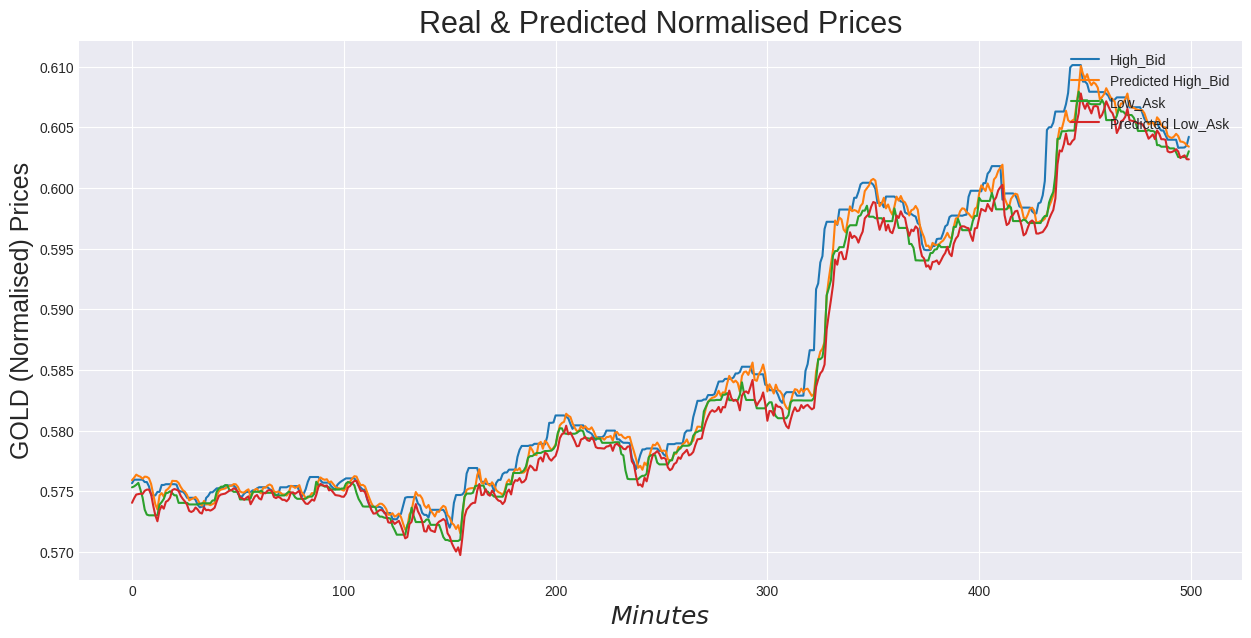

In [93]:
N1=7000  # the firt minute for the chart  
LL = 500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


### Detailed normilised price chart

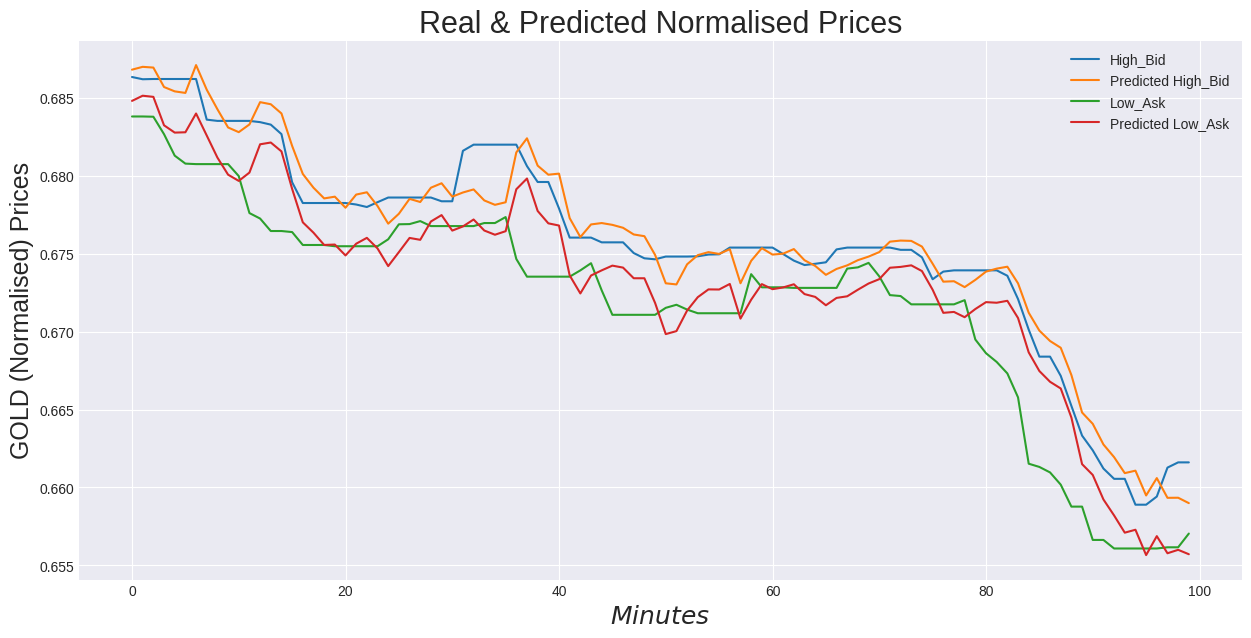

In [94]:
N1=27000  # the firt minute for the chart  
LL = 100  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

### Error Chart

In [95]:
# For 2020:

max_price = 2075.925
min_price = 1451.148

delta_price = max_price - min_price

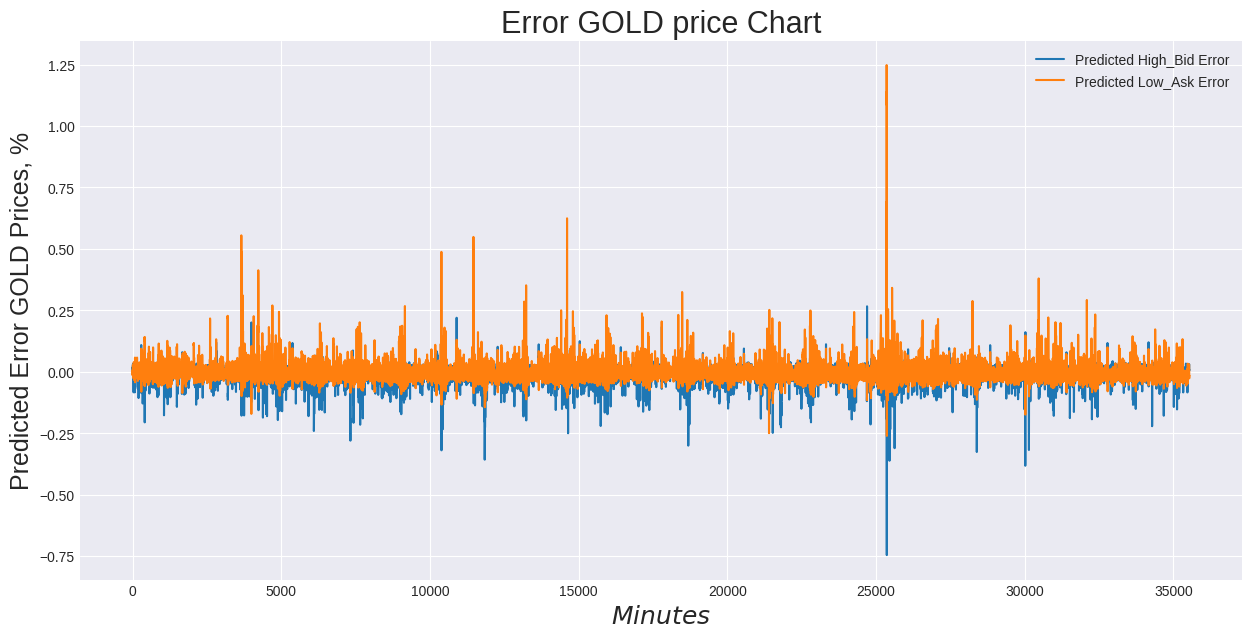

In [96]:
N1=0  # the firt minute for the chart  
#LL = 1000  # leigt (in minutes) for the chart
LL = len(pred)  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0] - y_test[N1:N2,0]) * delta_price / max_price *100
b = (pred[N1:N2,1] - y_test[N1:N2,1]) * delta_price / max_price *100

#a = (pred[N1:N2,0] - y_test[N1:N2,0]) * delta_price 
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) * delta_price 

line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error GOLD price Chart', size=22)
plt.ylabel('Predicted Error GOLD Prices, %', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

### MSE only

In [97]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=15, verbose=1)

In [98]:
mc = ModelCheckpoint(
    'CNN_mse-only_2020_Batch20_Epoch100_Patience15_during-5-minute_HighLowPrices_history-50min-{epoch:02d}-{val_mse:.9f}.h5', 
                     monitor='val_mse', mode='min', save_best_only=True)

In [99]:
model.compile(optimizer="adam",loss="mse",metrics='mse')

In [100]:
history_3 = model.fit(X_train, y_train, batch_size=20, epochs=100,
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es, mc])

Epoch 1/100
14400/14400 [==============================] - 55s 4ms/step - loss: 4.0796e-06 - mse: 4.0796e-06 - val_loss: 5.0789e-06 - val_mse: 5.0789e-06
Epoch 2/100
14400/14400 [==============================] - 53s 4ms/step - loss: 4.0363e-06 - mse: 4.0363e-06 - val_loss: 2.2049e-06 - val_mse: 2.2049e-06
Epoch 3/100
14400/14400 [==============================] - 55s 4ms/step - loss: 3.9509e-06 - mse: 3.9509e-06 - val_loss: 2.3125e-06 - val_mse: 2.3125e-06
Epoch 4/100
14400/14400 [==============================] - 55s 4ms/step - loss: 3.9157e-06 - mse: 3.9157e-06 - val_loss: 2.2854e-06 - val_mse: 2.2854e-06
Epoch 5/100
14400/14400 [==============================] - 55s 4ms/step - loss: 3.8707e-06 - mse: 3.8707e-06 - val_loss: 2.0422e-06 - val_mse: 2.0422e-06
Epoch 6/100
14400/14400 [==============================] - 55s 4ms/step - loss: 3.8931e-06 - mse: 3.8931e-06 - val_loss: 6.5320e-06 - val_mse: 6.5320e-06
Epoch 7/100
14400/14400 [==============================] - 55s 4ms/step - lo

In [102]:
# load the saved best model
# It has to be chosen manually from the saved best models.

CNN_saved_best_model_2 = keras.models.load_model(
    '/content/CNN_mse-only_2020_Batch20_Epoch100_Patience15_during-5-minute_HighLowPrices_history-50min-05-0.000002042.h5')

In [103]:
# Evaluate the quality of network training on test data (which the network did NOT see)
scores_2 = CNN_saved_best_model_2.evaluate(X_test, y_test, verbose=0)

In [104]:
scores_2

[1.6145421568580787e-06, 1.6145421568580787e-06]

##  <font color='red'>! This is the BEST test MSE value for 5 minutesfor 2020 with CNN: </font>
###  <font color='red'>And the MSE is better than the best MSE with LSTM for 2020</font>

In [105]:
print("Mean squared error (mse): %.9f " % (scores_2[1]))

Mean squared error (mse): 0.000001615 


#### MSE graphs during training

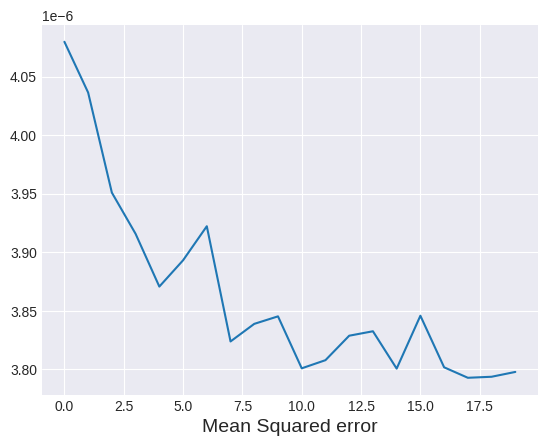

In [106]:
# Training Mean Absolute Error(MAE)

pyplot.plot(history_3.history['mse'])
plt.xlabel('Mean Squared error',size=14)
pyplot.show()

<ipython-input-107-d490c2536960>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


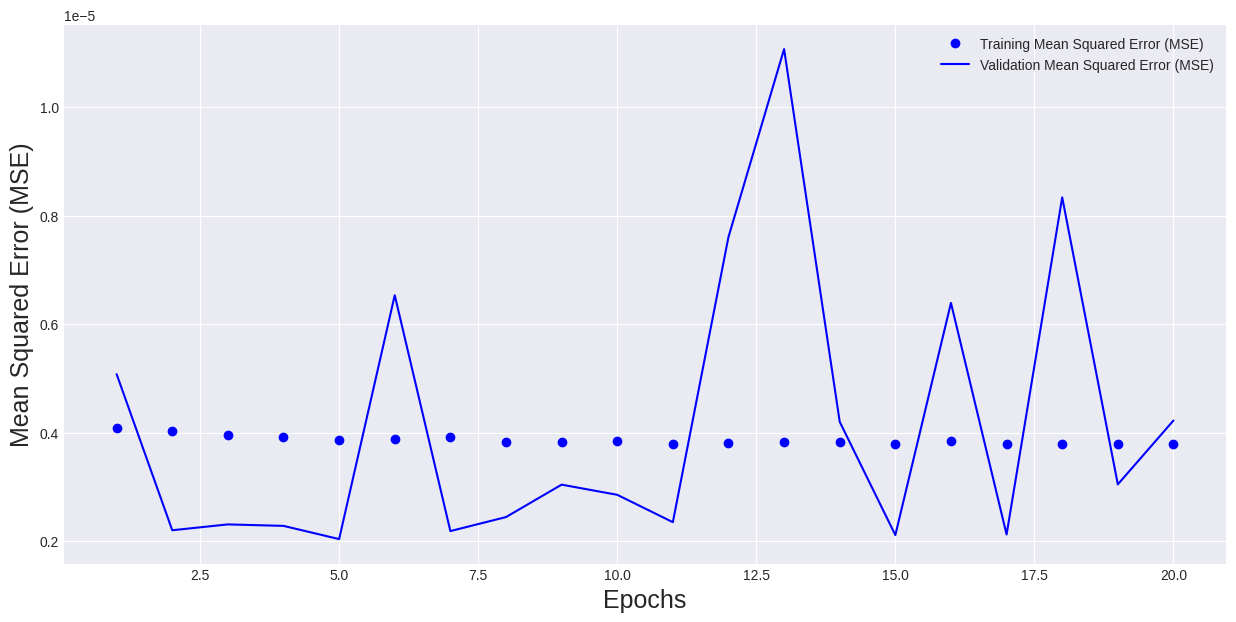

In [107]:
history_dict_3 = history_3.history
plt.style.use('seaborn-darkgrid') 
mse_values = history_dict_3['mse']

val_mse_values = history_dict_3['val_mse']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

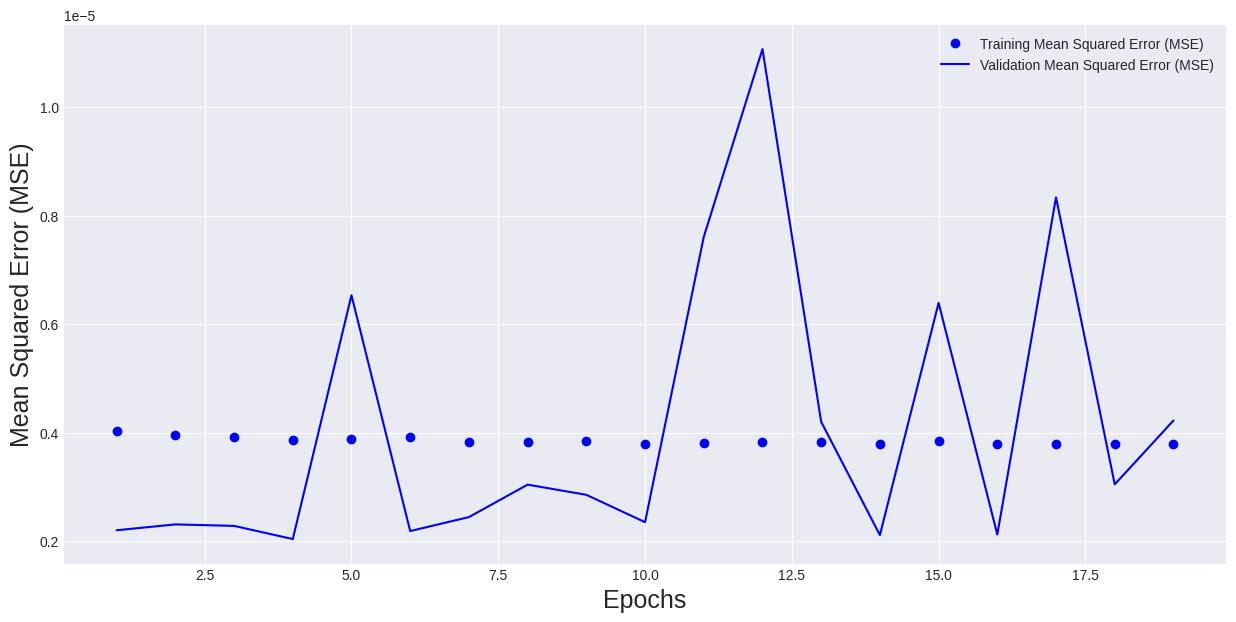

In [108]:
# deleted the 1st epoch

history_dict_3 = history_3.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict_3['mse'][1:]

val_mse_values = history_dict_3['val_mse'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

In [109]:
pred = CNN_saved_best_model_2.predict(X_test)

1111/1111 [==============================] - 2s 2ms/step


In [110]:
print(pred)

[[0.56580085 0.56380415]
 [0.5660128  0.56409913]
 [0.56637675 0.5645803 ]
 ...
 [0.71594274 0.71478105]
 [0.715981   0.71484107]
 [0.7158595  0.7147185 ]]


In [111]:
len(pred)

35535

### Detailed normilised price chart

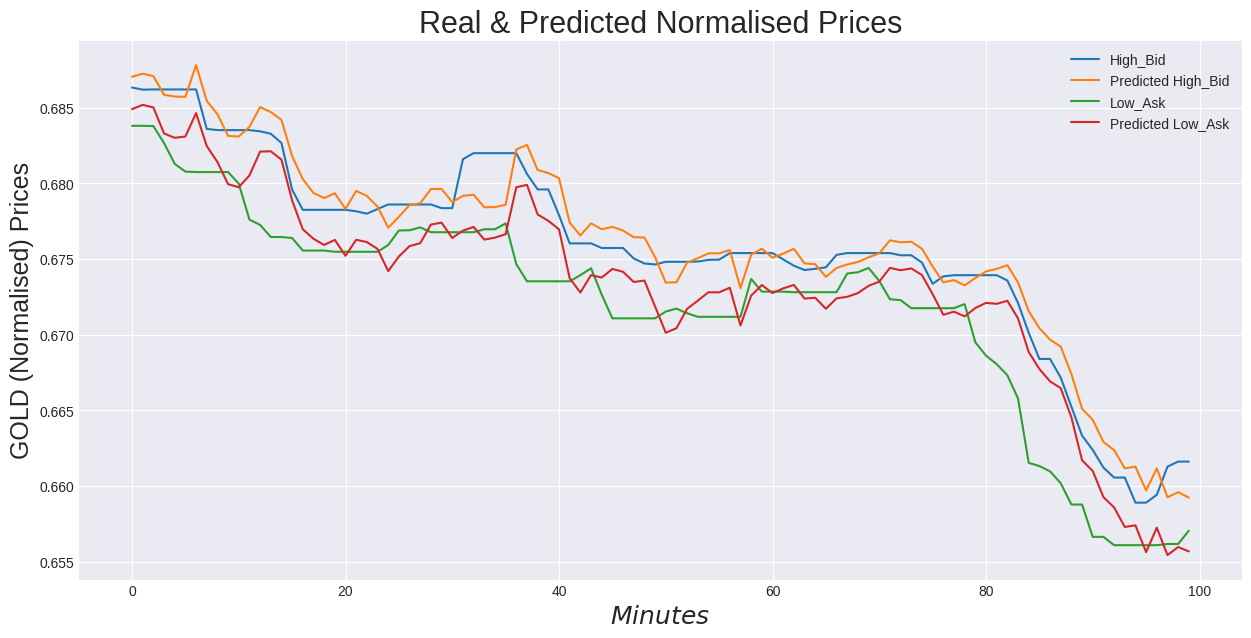

In [112]:
N1=27000  # the fifth minute for the chart  
LL = 100  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()